In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"soumyadeeproycsbs","key":"5a096f9b6c41b4f9f63e24e48043485e"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle

In [49]:
! kaggle datasets download masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
 98% 145M/149M [00:00<00:00, 212MB/s]
100% 149M/149M [00:00<00:00, 198MB/s]


In [50]:
! unzip brain-tumor-mri-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/

In [10]:
!pip install keras-tuner

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
# Define image dimensions and batch size
IMG_SIZE = 80  # Image size as per the model in the document
BATCH_SIZE = 32
EPOCHS = 25
LEARNING_RATE = 0.001

In [51]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

def load_data(data_dir):
    images, labels = [], []
    class_names = sorted(os.listdir(data_dir))  # ['glioma', 'meningioma', 'nontumor', 'pituitary']

    for label, class_name in enumerate(class_names):
        class_path = os.path.join(data_dir, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                img = load_img(img_path, target_size=(IMG_SIZE,IMG_SIZE))
                img_array = img_to_array(img) / 255.0
                images.append(img_array)
                labels.append(label)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

    return np.array(images), np.array(labels)

# Load the training and testing data
X_train, y_train = load_data('/content/Training')
X_test, y_test = load_data('/content/Testing')

# Optional: Split training data into train/validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print data shapes to verify
print(f"Training data shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, Labels: {y_val.shape}")
print(f"Testing data shape: {X_test.shape}, Labels: {y_test.shape}")

Training data shape: (4569, 80, 80, 3), Labels: (4569,)
Validation data shape: (1143, 80, 80, 3), Labels: (1143,)
Testing data shape: (1311, 80, 80, 3), Labels: (1311,)


In [32]:
# Define the 2D CNN model
def create_2d_cnn():
    model = Sequential()

    # First Convolutional Block with 64 filters
    model.add(Conv2D(64, (2, 2), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    # Second Convolutional Block with 32 filters
    model.add(Conv2D(32, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    # Third Convolutional Block with 16 filters
    model.add(Conv2D(16, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(16, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    # Fourth Convolutional Block with 8 filters
    model.add(Conv2D(8, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(8, (2, 2), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.1))

    # Flatten the output and apply fully connected layers
    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.1))

    # Output layer
    model.add(Dense(4, activation='softmax'))  # 4 classes: glioma, meningioma, pituitary tumor, and healthy

    return model

# Instantiate and compile the model
model = create_2d_cnn()
model.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

 # to convert the integer class labels in y_train, y_val, and y_test into one-hot encoded vectors.

In [53]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=4)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=4)  # Also convert y_test

In [55]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_model.keras',  # Save the model to this path
    monitor='val_accuracy',  # Monitor validation accuracy
    save_best_only=True,  # Save only the best model
    mode='max',  # We want to maximize accuracy
    verbose=1  # Print a message when a new best model is saved
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)

Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.8833 - loss: 0.3239 - val_accuracy: 0.8618 - val_loss: 0.4217
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.9278 - loss: 0.1861 - val_accuracy: 0.9554 - val_loss: 0.1344
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.9441 - loss: 0.1652 - val_accuracy: 0.9449 - val_loss: 0.1478
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.9335 - loss: 0.1718 - val_accuracy: 0.9213 - val_loss: 0.2183
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.9374 - loss: 0.1557 - val_accuracy: 0.8836 - val_loss: 0.2790
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.9483 - loss: 0.1356 - val_accuracy: 0.9650 - val_loss: 0.1070
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 262s 2s/step - accuracy: 0.9529 - loss: 0.1258 - val_accuracy: 0.9528 - val_loss: 0.1138
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 275s 2s/step - accuracy: 0.9612 - loss: 0.1020 - val_accu

In [56]:
model.save('2dCNN-97.35.keras')

In [57]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 327ms/step - accuracy: 0.9562 - loss: 0.1550
Test Accuracy: 96.49%


In [58]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict class probabilities and convert to class labels
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test, axis=1)
# Define class names
class_names = ['glioma', 'meningioma', 'pituitary','notumor']

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_labels, y_pred, target_names=class_names))

41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 325ms/step
Classification Report:
              precision    recall  f1-score   support

      glioma       0.94      0.96      0.95       300
  meningioma       0.96      0.91      0.93       306
   pituitary       0.98      1.00      0.99       405
     notumor       0.97      0.98      0.97       300

    accuracy                           0.96      1311
   macro avg       0.96      0.96      0.96      1311
weighted avg       0.96      0.96      0.96      1311



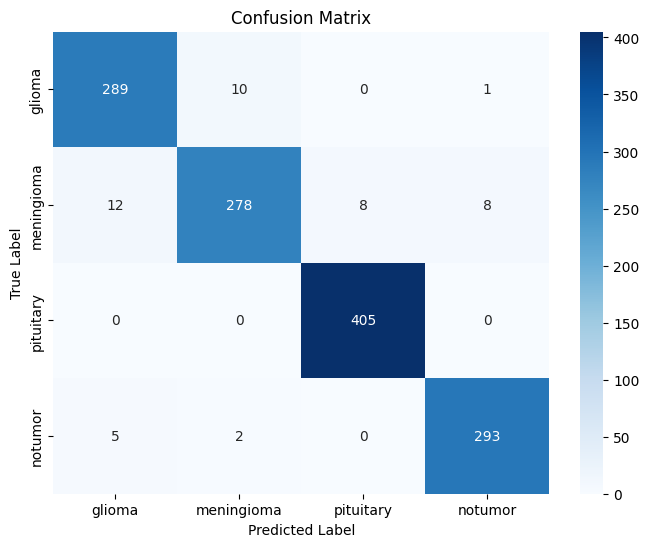

In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
y_test_labels = np.argmax(y_test, axis=1)
conf_matrix = confusion_matrix(y_test_labels, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()